In [1]:
#%matplotlib qt

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import linregress
import ZebraLib as zb
from scipy.optimize import curve_fit


class cilindro():
    def __init__(self, d, k, c, L, p, h):
        self.d = d
        self.k = k
        self.c = c
        self.L = L
        self.p = p
        self.h = h

    @property
    def bi(self):
        r = self.d/2
        V = np.pi*r**2*self.L
        As = 2*np.pi*r*(self.L+r)
        Lc = V/As
        return self.h*Lc/self.k

    @property
    def tau(self):
        r = self.d/2
        V = np.pi*(r**2)*self.L
        As = 2*np.pi*r*(self.L+r)
        return (self.p*self.c*V)/(self.h*As)

def T(E):
    return 4.0 + 22.9*E

def dist_temp(t, tau, ti, t_inf):
    return ((np.e**(-t/tau))*(ti - t_inf)) + t_inf

### Plot dos resultados experimentais

In [16]:
#import dos dados
df = pd.read_excel('D:/UNESP/EngMec-UNESP/Lab. TCM I/Relatório_4/dados.xlsx')

#Transformando os mv em C
df2 = pd.DataFrame({'ca1':T(df.ca1), 'cr1':T(df.cr1), 'ca2':T(df.ca2), 'cr2':T(df.cr2), 
                    'ca3':T(df.ca3), 'cr3':T(df.cr3), 'ca4':T(df.ca4), 'cr4':T(df.cr4)})
                    
df2

,ca1,cr1,ca2,cr2,ca3,cr3,ca4,cr4
0,25.8466,41.0064,26.2588,41.6018,26.9916,42.6094,26.8771,41.3957
1,28.6404,40.8919,34.6402,41.5102,30.3808,42.4949,28.6633,41.3957
2,30.7472,40.8232,36.5409,41.3957,33.1288,42.2201,30.2434,41.2583
3,33.4952,40.7087,38.2584,41.2125,35.1669,41.9453,31.7548,41.1667
4,33.9074,40.5942,39.0370,41.0751,36.7470,41.7163,33.0372,41.0522
...,...,...,...,...,...,...,...,...
104,40.7545,37.5485,42.9987,35.9684,42.5865,34.4112,41.2812,36.1516
105,40.7545,37.5485,42.9987,35.9684,42.5865,34.4112,41.2812,36.0829
106,40.7545,37.5485,42.9987,35.9684,42.5865,34.4112,41.2812,36.0829
107,40.7545,37.5485,42.9987,35.9684,42.5865,34.4112,41.2812,36.0142


### Cilindro 1

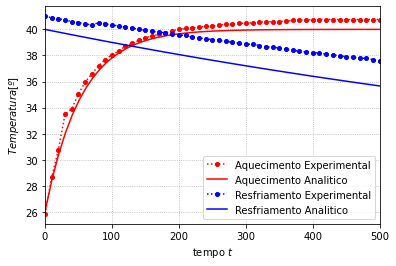

In [3]:
ca1 = cilindro(0.05, 237, 896, 0.200, 2707, 500)
cr1 = cilindro(0.05, 237, 896, 0.200, 2707, 20)

fig, ax = plt.subplots()

ax.set(xlim=(0, 500), xlabel = r'tempo $t$', ylabel = r'$Temperatura [º]$')

t = np.linspace(0.1, 500)

ax.plot(df.tempo, T(df.ca1), label = "Aquecimento Experimental", c='red', marker='o', markersize=4, ls=':')
ax.plot(t, dist_temp(t, ca1.tau, 26, 40), c='red', label = "Aquecimento Analitico")

ax.plot(df.tempo, T(df.cr1), label = "Resfriamento Experimental",  c='blue', marker='o', markersize=4, ls=':')
ax.plot(t, dist_temp(t, cr1.tau, 40, 26), label = "Resfriamento Analitico", c='blue')

ax.grid(ls='dotted')
ax.legend()
fig.savefig('figura1.pdf', bbox_inches='tight')

### Cilindro 2

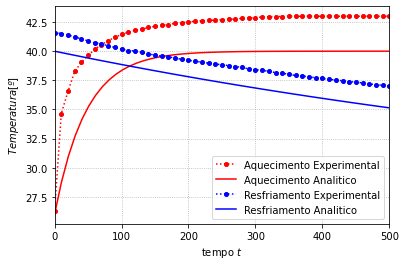

In [4]:
ca2 = cilindro(0.05, 237, 896, 0.085, 2707, 500)
cr2 = cilindro(0.05, 237, 896, 0.085, 2707, 20)

fig, ax = plt.subplots()

ax.set(xlim=(0, 500), xlabel = r'tempo $t$', ylabel = r'$Temperatura [º]$')

t = np.linspace(0.1, 500)

ax.plot(df.tempo, T(df.ca2), label = "Aquecimento Experimental", c='red', marker='o', markersize=4, ls=':')
ax.plot(t, dist_temp(t, ca2.tau, 26, 40), c='red', label = "Aquecimento Analitico")

ax.plot(df.tempo, T(df.cr2), label = "Resfriamento Experimental",  c='blue', marker='o', markersize=4, ls=':')
ax.plot(t, dist_temp(t, cr2.tau, 40, 26), label = "Resfriamento Analitico", c='blue')

ax.grid(ls='dotted')
ax.legend()
fig.savefig('figura2.pdf', bbox_inches='tight')

### Cilindro 3

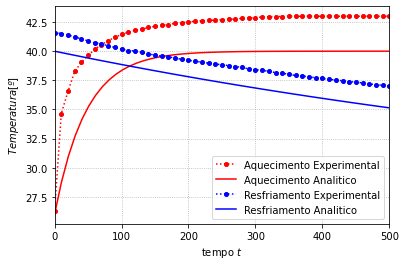

In [5]:
ca3 = cilindro(0.035, 237, 896, 0.200, 2707, 500)
cr3 = cilindro(0.035, 237, 896, 0.200, 2707, 20)

fig, ax = plt.subplots()

ax.set(xlim=(0, 500), xlabel = r'tempo $t$', ylabel = r'$Temperatura [º]$')

t = np.linspace(0.1, 500)

ax.plot(df.tempo, T(df.ca2), label = "Aquecimento Experimental", c='red', marker='o', markersize=4, ls=':')
ax.plot(t, dist_temp(t, ca2.tau, 26, 40), c='red', label = "Aquecimento Analitico")

ax.plot(df.tempo, T(df.cr2), label = "Resfriamento Experimental",  c='blue', marker='o', markersize=4, ls=':')
ax.plot(t, dist_temp(t, cr2.tau, 40, 26), label = "Resfriamento Analitico", c='blue')

ax.grid(ls='dotted')
ax.legend()
fig.savefig('figura3.pdf', bbox_inches='tight')

### Cilindro 4

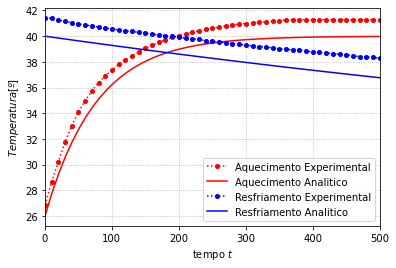

In [6]:
ca4 = cilindro(0.05, 413, 383, 0.200, 8954, 500)
cr4 = cilindro(0.05, 413, 383, 0.200, 8954, 20)

fig, ax = plt.subplots()

ax.set(xlim=(0, 500), xlabel = r'tempo $t$', ylabel = r'$Temperatura [º]$')

t = np.linspace(0.1, 500)

ax.plot(df.tempo, T(df.ca4), label = "Aquecimento Experimental", c='red', marker='o', markersize=4, ls=':')
ax.plot(t, dist_temp(t, ca4.tau, 26, 40), c='red', label = "Aquecimento Analitico")

ax.plot(df.tempo, T(df.cr4), label = "Resfriamento Experimental",  c='blue', marker='o', markersize=4, ls=':')
ax.plot(t, dist_temp(t, cr4.tau, 40, 26), label = "Resfriamento Analitico", c='blue')

ax.grid(ls='dotted')
ax.legend()
fig.savefig('figura4.pdf', bbox_inches='tight')

### Todas as curvas de aquecimento

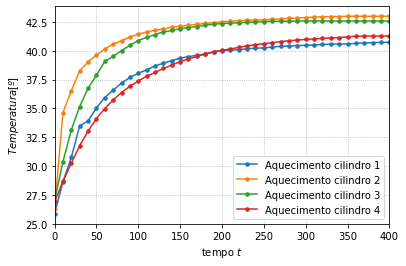

In [7]:
fig, ax = plt.subplots()

ax.set(xlim=(0, 400), xlabel = r'tempo $t$', ylabel = r'$Temperatura [º]$')

t = np.linspace(0.1, 10)

ax.plot(df.tempo, T(df.ca1), label = "Aquecimento cilindro 1", marker='o', markersize=3.5)
ax.plot(df.tempo, T(df.ca2), label = "Aquecimento cilindro 2", marker='o', markersize=3.5)
ax.plot(df.tempo, T(df.ca3), label = "Aquecimento cilindro 3", marker='o', markersize=3.5)
ax.plot(df.tempo, T(df.ca4), label = "Aquecimento cilindro 4", marker='o', markersize=3.5)

ax.grid(ls='dotted')
ax.legend()

fig.savefig('aquecimento.pdf', bbox_inches='tight')

### Todas as curvas de resfriamento

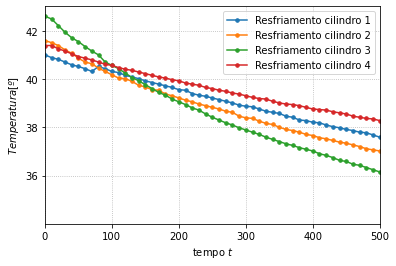

In [8]:
fig, ax = plt.subplots()

ax.set(xlim=(0, 500), xlabel = r'tempo $t$', ylabel = r'$Temperatura [º]$')

t = np.linspace(0.1, 10)

ax.plot(df.tempo, T(df.cr1), label = "Resfriamento cilindro 1", marker='o', markersize=3.5)
ax.plot(df.tempo, T(df.cr2), label = "Resfriamento cilindro 2", marker='o', markersize=3.5)
ax.plot(df.tempo, T(df.cr3), label = "Resfriamento cilindro 3", marker='o', markersize=3.5)
ax.plot(df.tempo, T(df.cr4), label = "Resfriamento cilindro 4", marker='o', markersize=3.5)

ax.grid(ls='dotted')
ax.legend()

fig.savefig('resfriamento.pdf', bbox_inches='tight')

### Cálculo do numero de Bi

In [9]:
ca1 = cilindro(0.05, 237, 896, 0.200, 2707, 500)
ca2 = cilindro(0.05, 237, 896, 0.085, 2707, 500)
ca3 = cilindro(0.035, 237, 896, 0.200, 2707, 500)
ca4 = cilindro(0.05, 413, 383, 0.200, 8954, 500)

cr1 = cilindro(0.05, 237, 896, 0.200, 2707, 20)
cr2 = cilindro(0.05, 237, 896, 0.085, 2707, 20)
cr3 = cilindro(0.035, 237, 896, 0.200, 2707, 20)
cr4 = cilindro(0.05, 413, 383, 0.200, 8954, 20)

cr = [cr1.tau, cr2.tau, cr3.tau, cr4.tau]
ca = [ca1.tau, ca2.tau, ca3.tau, ca4.tau]

pd.DataFrame({'a':ca, 'b':cr})

,a,b
0,53.899378,1347.484444
1,46.855709,1171.392727
2,39.030584,975.764598
3,76.208489,1905.212222


### Gerando os dados analíticos

In [21]:
t = np.linspace(0.1, 500, 109)

A1 = dist_temp(t, ca1.tau, 40, 26)
A2 = dist_temp(t, ca2.tau, 40, 26)
A3 = dist_temp(t, ca3.tau, 40, 26)
A4 = dist_temp(t, ca4.tau, 40, 26)

C1 = dist_temp(t, cr1.tau, 26, 40)
C2 = dist_temp(t, cr2.tau, 26, 40)
C3 = dist_temp(t, cr3.tau, 26, 40)
C4 = dist_temp(t, cr4.tau, 26, 40)

cr = [C1, C2, C3, C4]
ca = [A1, A2, A3, A4]

df = pd.DataFrame({'A1':A1, 'A2':A2, 'A3':A3, 'A4':A4, 'C1':C1, 'C2':C2, 'C3':C3, 'C4':C4})
df
#df.to_excel('D:/UNESP/EngMec-UNESP/Lab. TCM I/Relatório_4/dados_analitico.xlsx')

,A1,A2,A3,A4,C1,C2,C3,C4
0,39.974050,39.970153,39.964177,39.981641,26.001039,26.001195,26.001435,26.000735
1,38.824088,38.656068,38.402568,39.157708,26.049044,26.056402,26.067682,26.034705
2,37.768759,37.465591,37.015593,38.382329,26.096884,26.111390,26.133616,26.068592
3,36.800277,36.387094,35.783723,37.652643,26.144560,26.166162,26.199238,26.102397
4,35.911493,35.410045,34.689613,36.965957,26.192073,26.220718,26.264549,26.136120
...,...,...,...,...,...,...,...,...
104,26.001847,26.000482,26.000061,26.025250,30.206334,30.718522,31.452718,29.126405
105,26.001695,26.000437,26.000055,26.023762,30.239919,30.755125,31.493168,29.152790
106,26.001556,26.000396,26.000048,26.022361,30.273388,30.791583,31.533426,29.179112
107,26.001428,26.000359,26.000043,26.021044,30.306742,30.827898,31.573493,29.205369
